# importing libraries


In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [44]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [45]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [46]:
df = df.drop('car_ID',axis =1) #Dropping car_id column

In [47]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [48]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Taking out company name from car name

In [49]:
df['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [50]:
df['CarCompany'] = df['CarName'].apply(lambda x: x.split()[0])

In [51]:
df['CarCompany']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarCompany, Length: 205, dtype: object

In [52]:
df =df.drop('CarName' , axis =1)# dropping carName column

## Storing data of different data type in different list 

In [53]:
cat_var = [ 'CarCompany','fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber','fuelsystem']

In [54]:
int_var =[ 'symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']

## Visualizing the data 

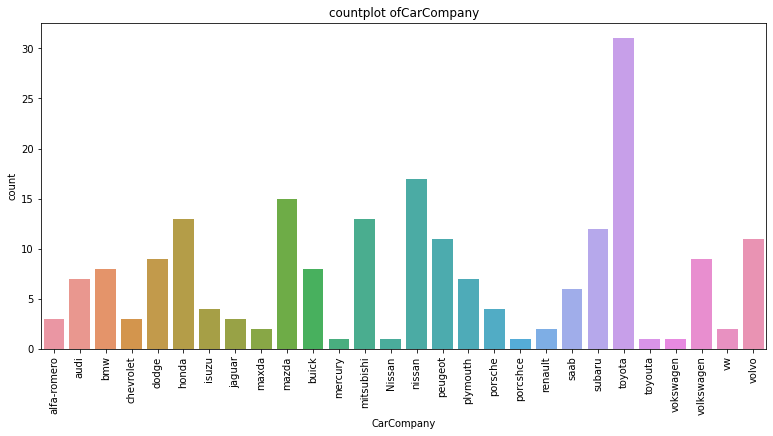

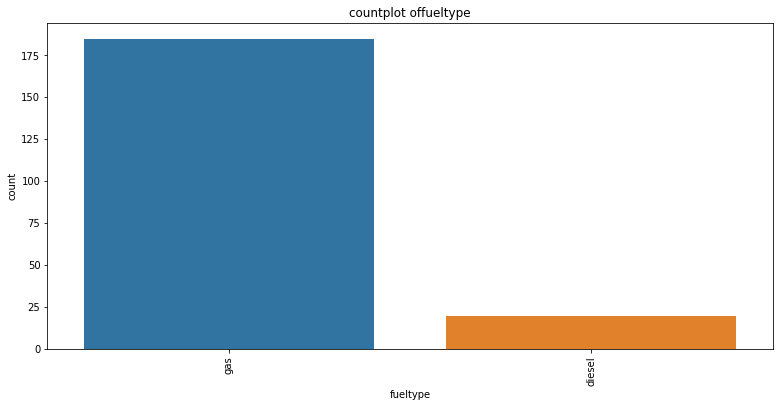

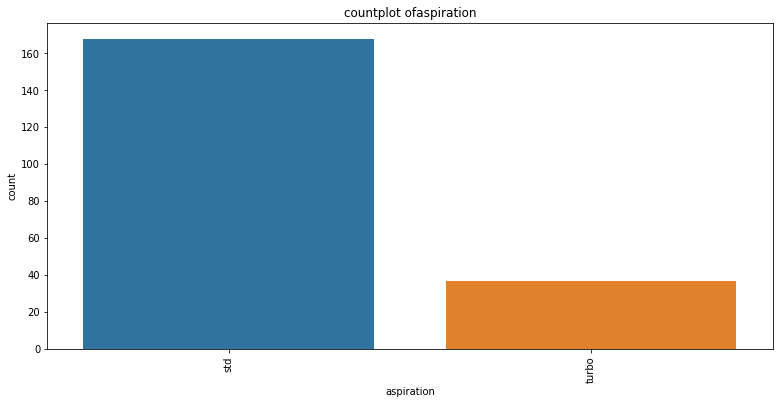

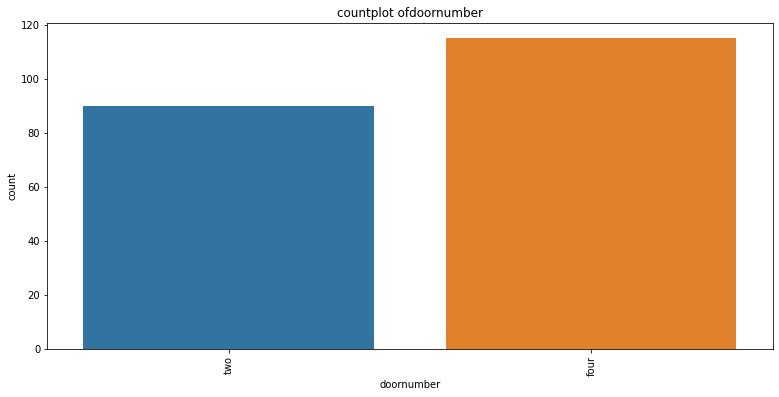

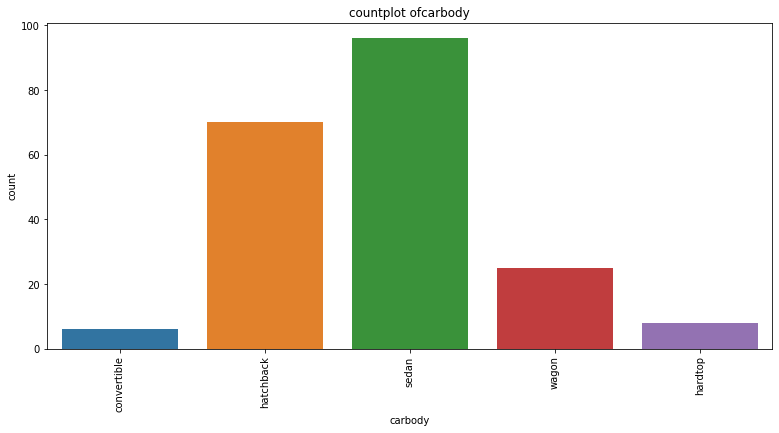

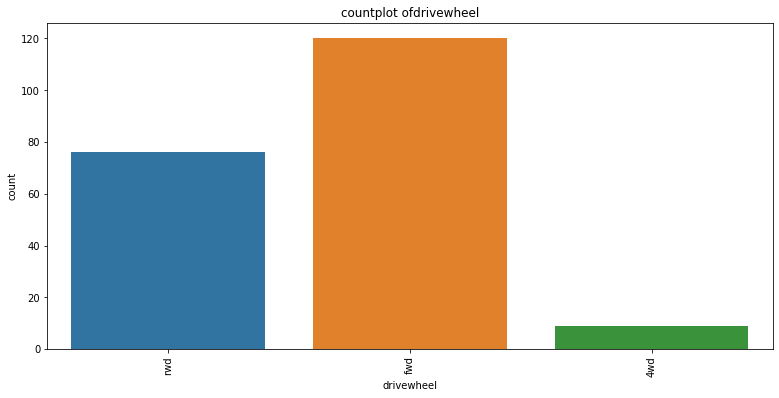

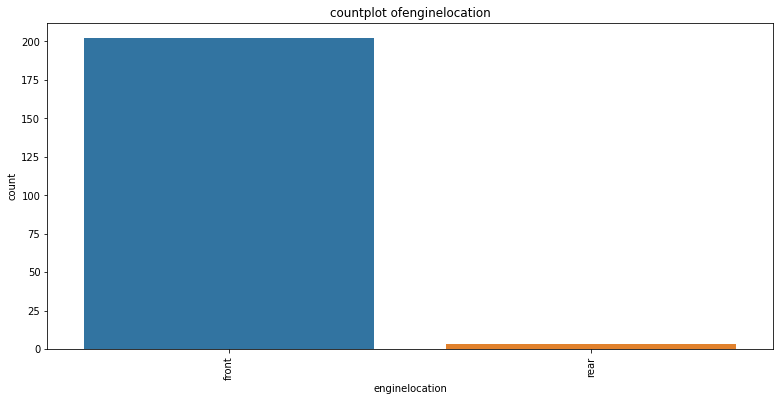

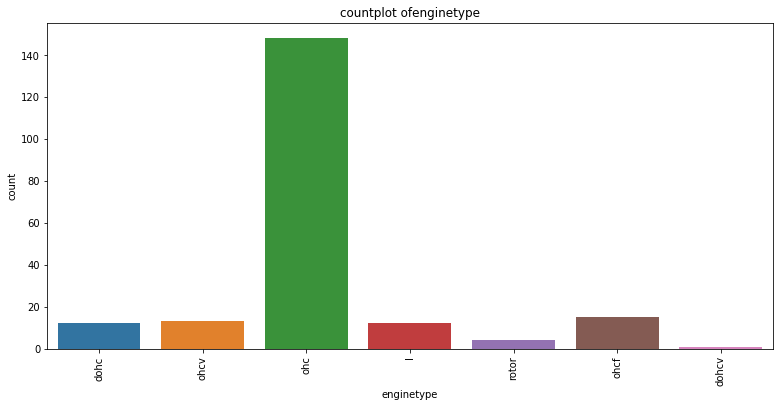

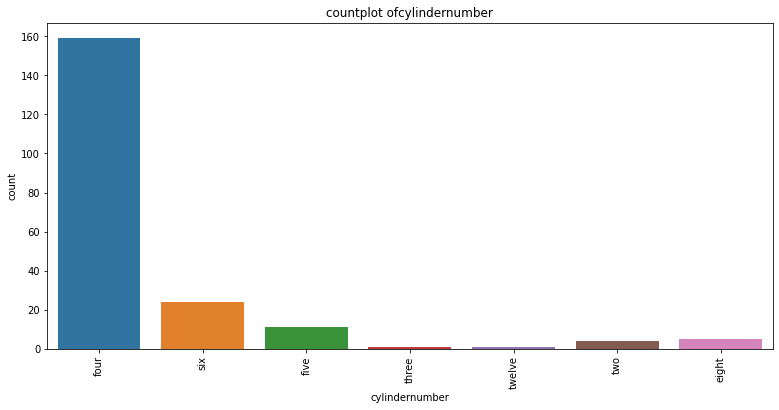

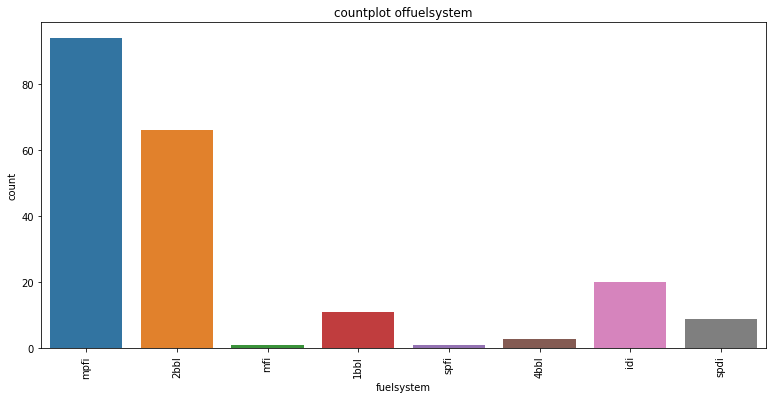

In [55]:
for i in cat_var:
    plt.figure(figsize =(13,6))
    sns.countplot(data =df ,x =i)
    plt.xticks(rotation=90)
    plt.title(f'countplot of{i}')
    plt.show()


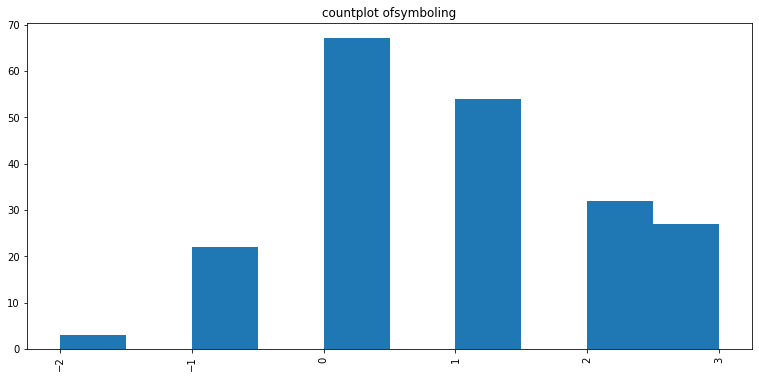

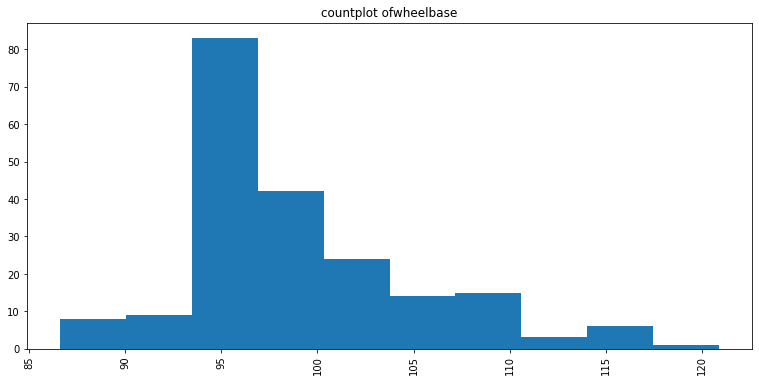

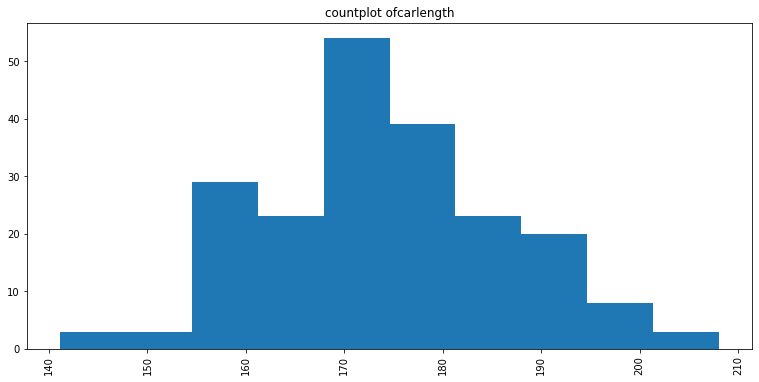

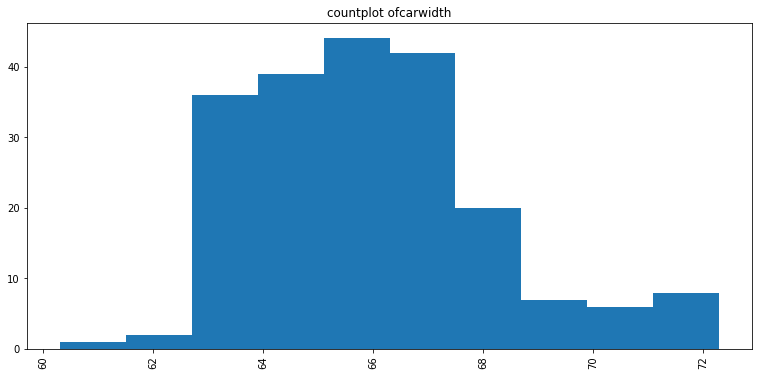

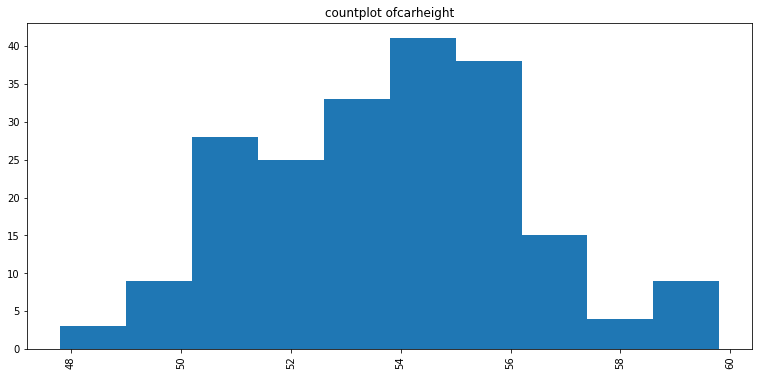

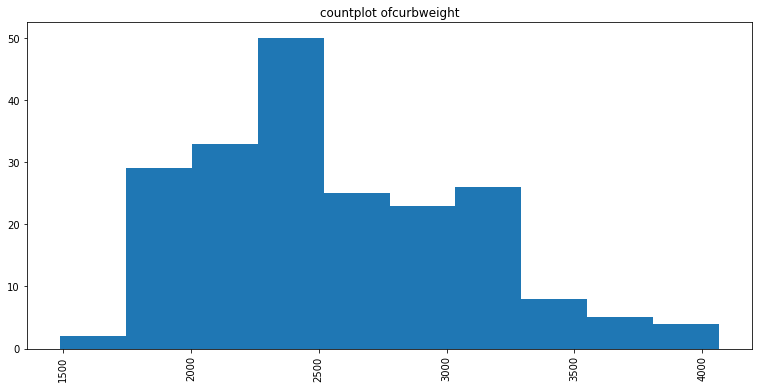

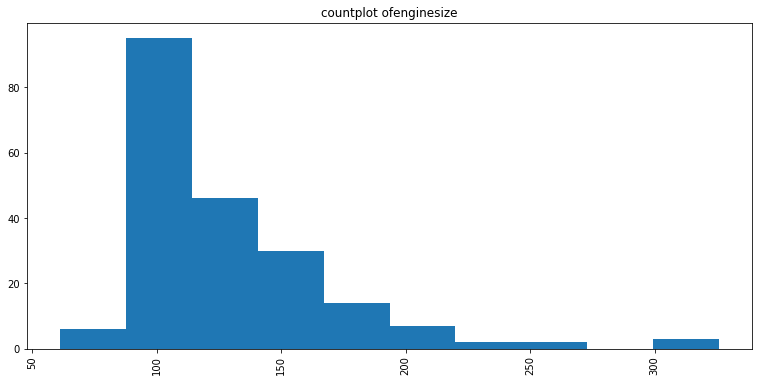

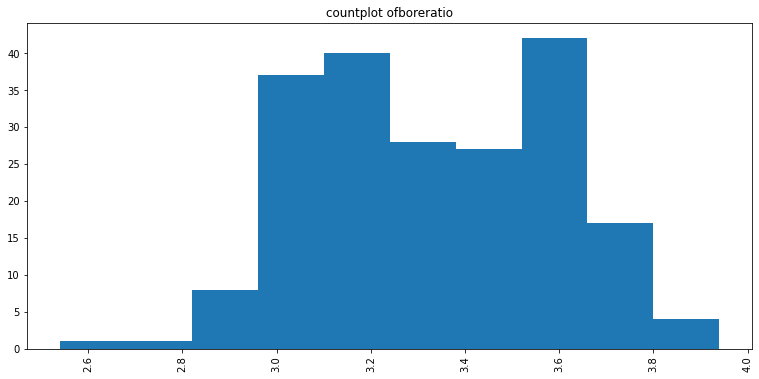

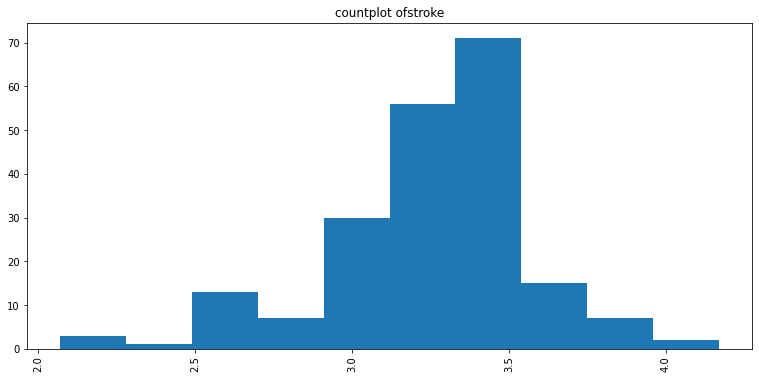

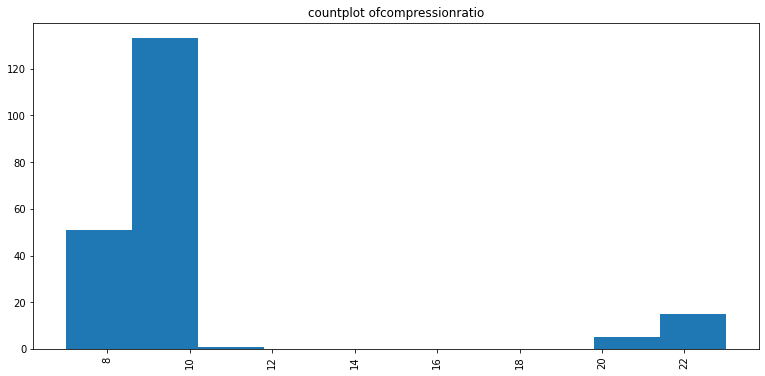

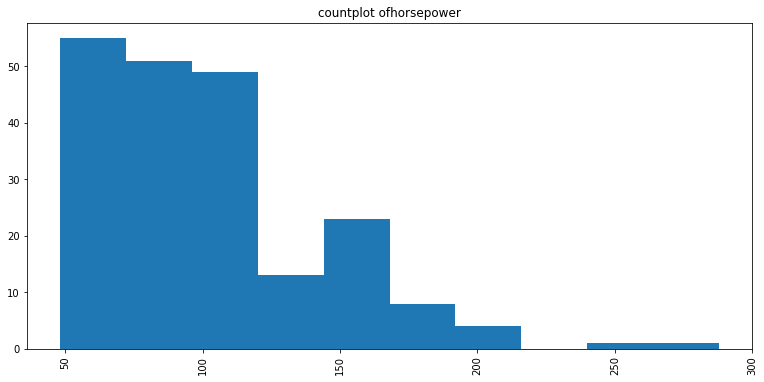

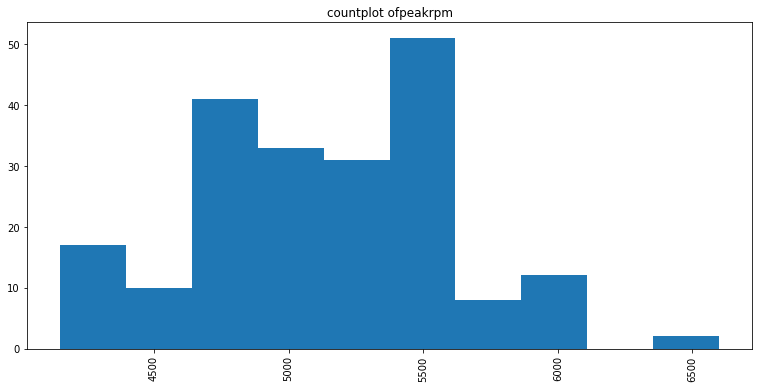

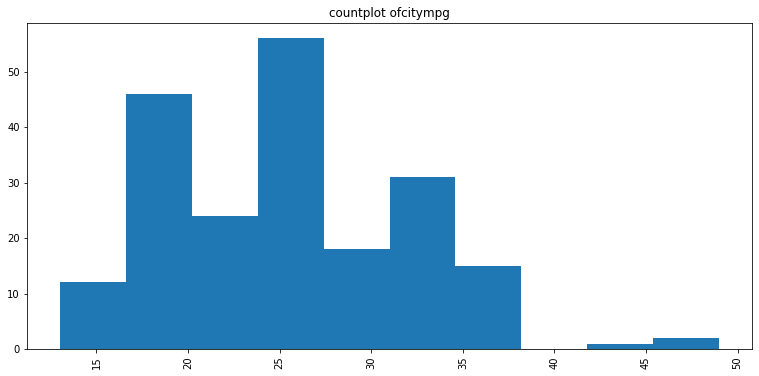

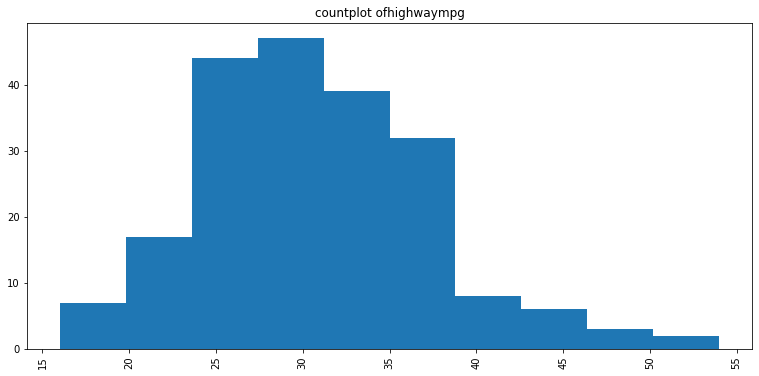

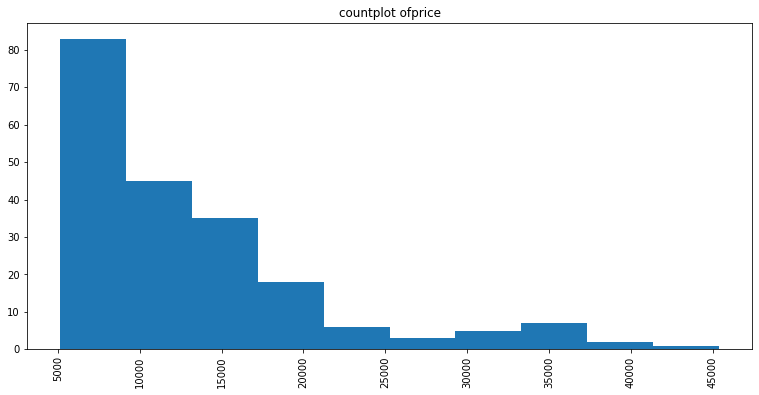

In [56]:
for i in int_var:
    plt.figure(figsize =(13,6))
    plt.hist(data =df ,x =i)
    plt.xticks(rotation=90)
    plt.title(f'countplot of{i}')
    plt.show()

## Checking for Multicollinearity

In [57]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

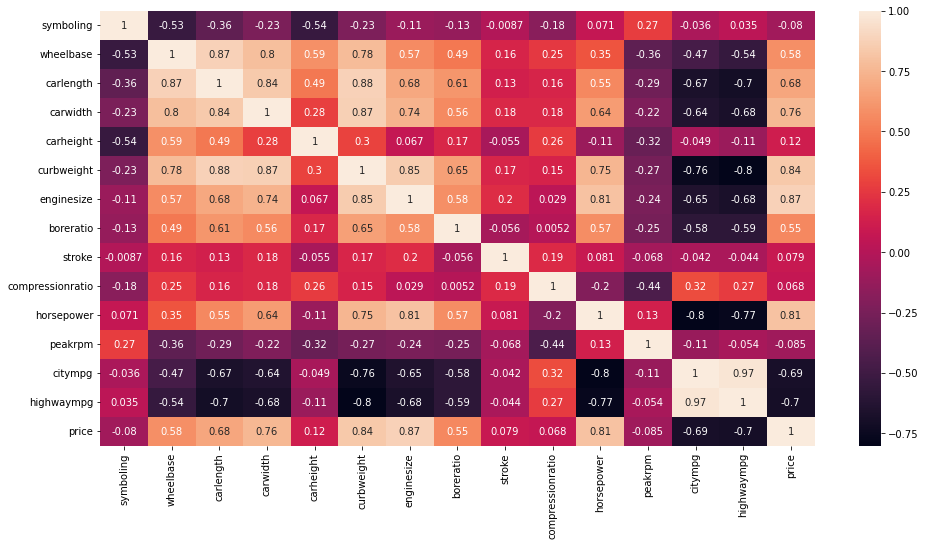

In [58]:
plt.figure(figsize =(16,8))
sns.heatmap(df.corr(),annot = True)

## Checking outliers

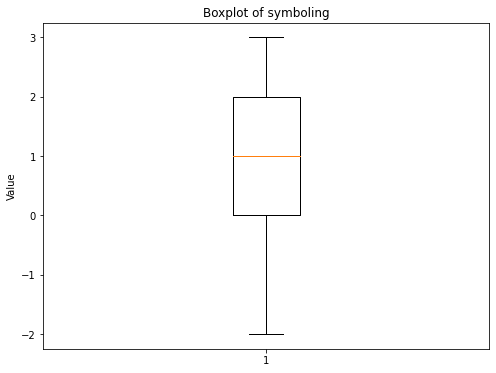

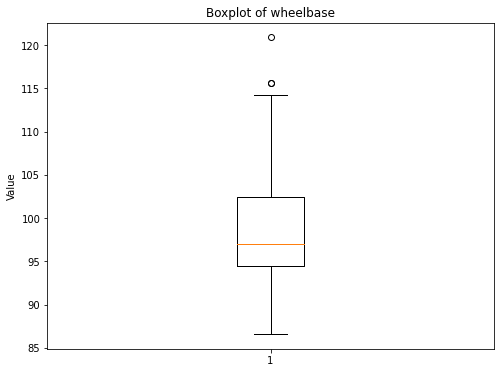

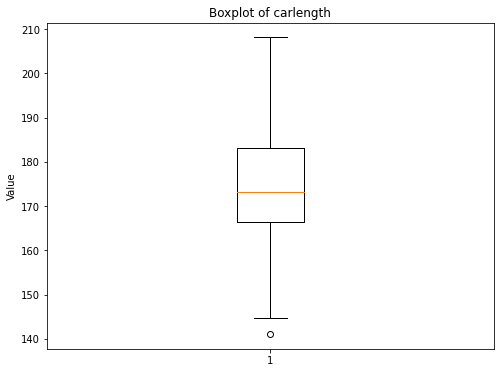

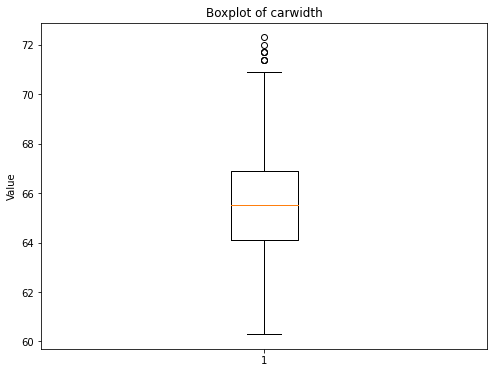

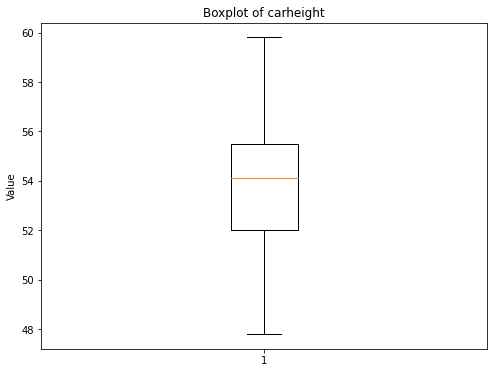

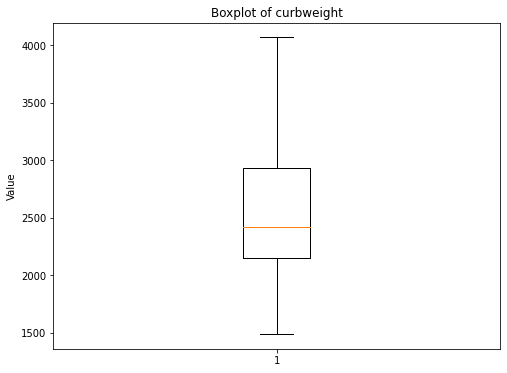

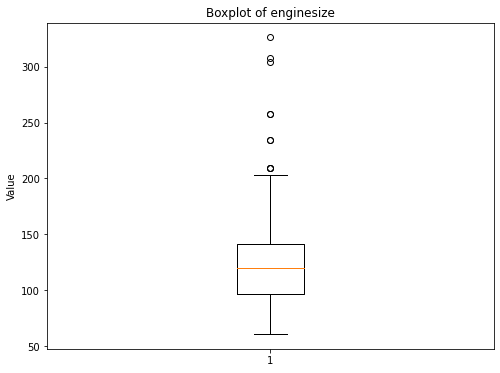

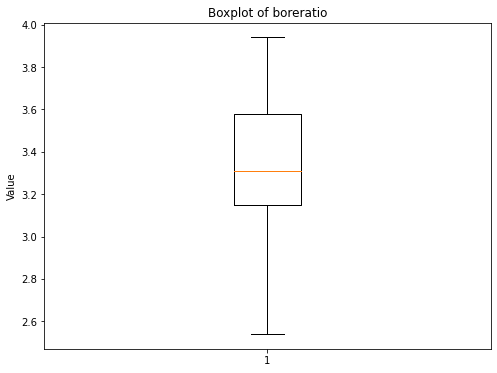

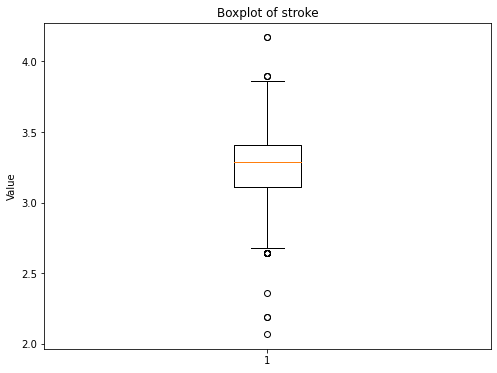

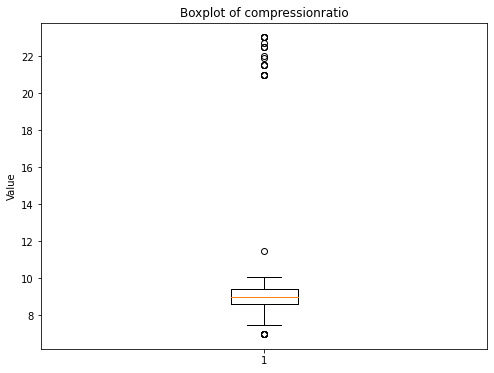

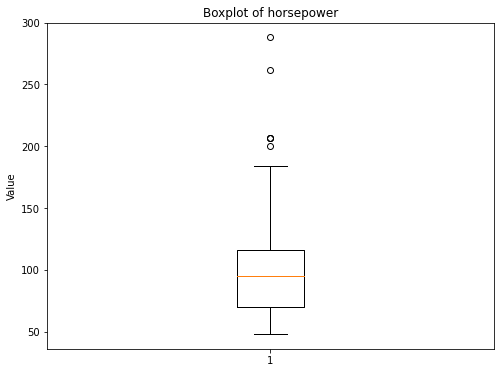

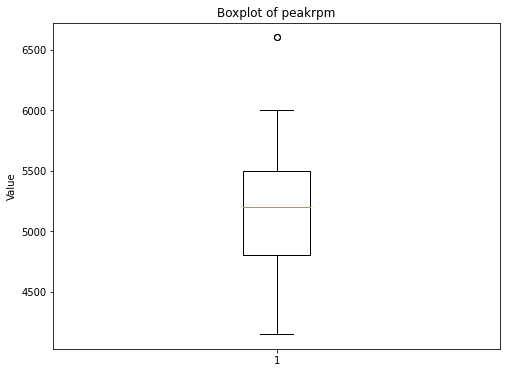

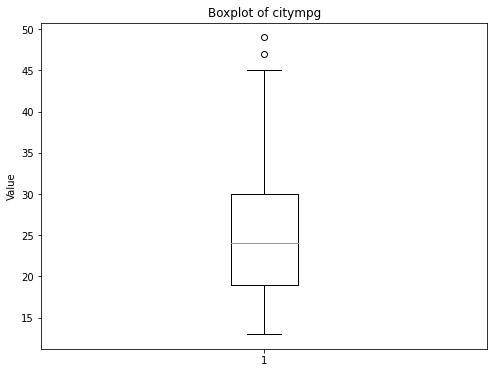

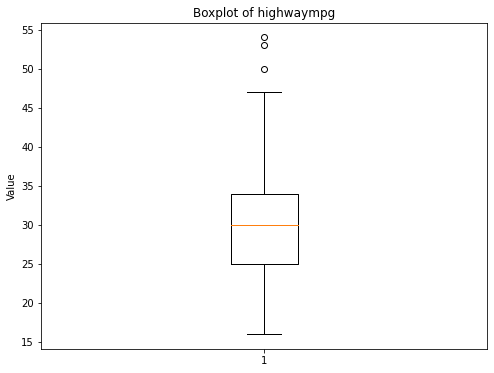

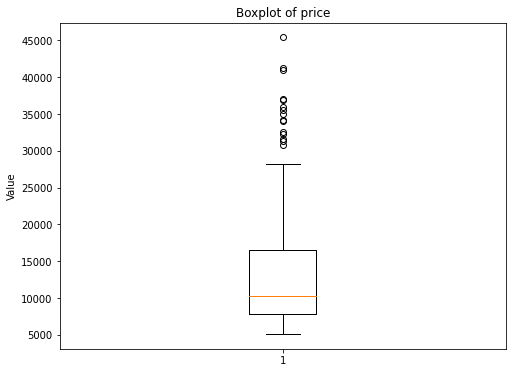

In [59]:
for i in int_var:
    plt.figure(figsize=(8, 6))  
    plt.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.ylabel('Value')
    plt.show()

In [60]:
df.skew()

C:\Users\payal\AppData\Local\Temp\ipykernel_18616\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

## Converting categorical data into numerical

In [61]:
label_encoder = LabelEncoder()

In [62]:
for column in cat_var:
    df[column] = label_encoder.fit_transform(df[column])

In [63]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [64]:
int_var

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

## Dealing with outliers

In [65]:
columns_to_handle = ['carwidth','enginesize','stroke','compressionratio','horsepower','price']

In [66]:
for column in columns_to_handle:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
print(df.head())

   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0       88.6      168.8      64.1  ...           5       3.47   
1               0       88.6      168.8      64.1  ...           5       3.47   
2               0       94.5      171.2      65.5  ...           5       2.68   
3               0       99.8      176.6      66.2  ...           5       3.19   
4               0       99.4      176.6      66.4  ...           5       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68    

## Checking duplicates and dropping it

In [67]:
df.duplicated().sum()

1

In [68]:
# df = df.drop_duplicates()

## Splitting independent and dependent variable 

In [69]:
X = df.drop('price' , axis =1)
y = df['price']

In [70]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarCompany
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130.0,5,3.47,2.68,9.0,111.0,5000,21,27,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130.0,5,3.47,2.68,9.0,111.0,5000,21,27,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152.0,5,2.68,3.47,9.0,154.0,5000,19,26,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109.0,5,3.19,3.40,10.0,102.0,5500,24,30,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136.0,5,3.19,3.40,8.0,115.0,5500,18,22,2


In [71]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# checking vif of each variable

In [72]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [73]:
vif_data

,Variable,VIF
0,symboling,3.987206
1,fueltype,49.526612
2,aspiration,3.669597
3,doornumber,4.919553
4,carbody,28.594668
5,drivewheel,17.814846
6,enginelocation,1.827349
7,wheelbase,2678.582233
8,carlength,2332.944147
9,carwidth,4643.397474


## Performing Standard scaler method

In [74]:
st = StandardScaler()

In [75]:
X =st.fit_transform(X)

## Splitting data into testing and training data 

In [76]:
X_train , X_test ,y_train ,y_test =train_test_split(X,y, test_size =0.20 , random_state =452)

In [77]:
lr =  LinearRegression()#fitting the data into linear regression model

In [78]:
lr.fit(X_train , y_train)

LinearRegression()

In [79]:
y_pred =lr.predict(X_test)

In [80]:
y_pred

array([ 7621.05895599, 25056.56922825, 17796.11949998,  9097.40836362,
        9783.71865472, 16089.2873251 , 29431.27229043,  5299.17447265,
       14168.16450601, 13827.06517471, 19691.68780689, 17355.5012356 ,
        7652.53365006,  9260.49285365,  8682.7972447 ,  7885.88315854,
        7142.73685868, 14638.23252009, 24900.68551364, 18767.58278244,
        5221.90686316, 11807.27046001, 15173.41919649, 13908.05174402,
       12790.11488403,  6875.70142398,  6733.57930808, 10875.2411536 ,
       10534.40510891, 13836.36327802,  5950.02457931,  9565.6716993 ,
       11640.03366312,  7583.32895372,  9427.51602176,  7460.54061488,
       19237.98902778,  5201.62068005,  9967.92677522, 13678.12907664,
       20372.66309322])

In [81]:
y_test

51      6095.000
67     25552.000
0      13495.000
182     7775.000
37      7895.000
204    22625.000
74     29575.500
154     7898.000
135    15510.000
132    11850.000
103    13499.000
203    22470.000
22      6377.000
130     9295.000
141     7126.000
146     7463.000
78      6669.000
197    16515.000
16     29575.500
180    15690.000
118     5572.000
41     12945.000
194    12940.000
84     14489.000
167     8449.000
77      6189.000
122     7609.000
159     7788.000
175     9988.000
46     11048.000
151     6338.000
184     7995.000
28      8921.000
45      8916.500
23      7957.000
52      6795.000
7      18920.000
93      7349.000
57     13645.000
63     10795.000
9      17859.167
Name: price, dtype: float64

In [82]:
r2_score(y_test ,y_pred)

0.8298792810424275